## Extract file

In [1]:
import zipfile
import os

In [2]:
zip_path = "/media/bharath/drive/Projects/MIT/notebooks/archive.zip"
target_dir = 'final_data'

# os.makedirs(target_dir)

# with zipfile.ZipFile(zip_path, 'r') as zip_f:
#     zip_f.extractall(target_dir)

## Custom Dataset

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torchvision.models as models

from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
print(torch.__version__)

print(torchvision.__version__)

print(torch.version.cuda)

1.13.1
0.14.1
11.6


In [5]:
data_direc = os.path.join(target_dir,'indoorCVPR_09', 'Images')
num_classes = os.listdir(data_direc)
num_classes

['corridor',
 'laundromat',
 'airport_inside',
 'artstudio',
 'auditorium',
 'bakery',
 'bar',
 'bathroom',
 'bedroom',
 'bookstore',
 'bowling',
 'buffet',
 'casino',
 'children_room',
 'church_inside',
 'classroom',
 'cloister',
 'closet',
 'clothingstore',
 'computerroom',
 'concert_hall',
 'deli',
 'dentaloffice',
 'dining_room',
 'elevator',
 'fastfood_restaurant',
 'florist',
 'gameroom',
 'garage',
 'greenhouse',
 'grocerystore',
 'gym',
 'hairsalon',
 'hospitalroom',
 'inside_bus',
 'inside_subway',
 'jewelleryshop',
 'kindergarden',
 'kitchen',
 'laboratorywet',
 'library',
 'livingroom',
 'lobby',
 'locker_room',
 'mall',
 'meeting_room',
 'movietheater',
 'museum',
 'nursery',
 'office',
 'operating_room',
 'pantry',
 'poolinside',
 'prisoncell',
 'restaurant',
 'restaurant_kitchen',
 'shoeshop',
 'stairscase',
 'studiomusic',
 'subway',
 'toystore',
 'trainstation',
 'tv_studio',
 'videostore',
 'waitingroom',
 'warehouse',
 'winecellar']

In [6]:
len(num_classes)

67

In [7]:
idx_to_classes = {i:j for i, j in enumerate(num_classes)}

class_to_index = {value:key for key, value in idx_to_classes.items()}

In [8]:
idx_to_classes

{0: 'corridor',
 1: 'laundromat',
 2: 'airport_inside',
 3: 'artstudio',
 4: 'auditorium',
 5: 'bakery',
 6: 'bar',
 7: 'bathroom',
 8: 'bedroom',
 9: 'bookstore',
 10: 'bowling',
 11: 'buffet',
 12: 'casino',
 13: 'children_room',
 14: 'church_inside',
 15: 'classroom',
 16: 'cloister',
 17: 'closet',
 18: 'clothingstore',
 19: 'computerroom',
 20: 'concert_hall',
 21: 'deli',
 22: 'dentaloffice',
 23: 'dining_room',
 24: 'elevator',
 25: 'fastfood_restaurant',
 26: 'florist',
 27: 'gameroom',
 28: 'garage',
 29: 'greenhouse',
 30: 'grocerystore',
 31: 'gym',
 32: 'hairsalon',
 33: 'hospitalroom',
 34: 'inside_bus',
 35: 'inside_subway',
 36: 'jewelleryshop',
 37: 'kindergarden',
 38: 'kitchen',
 39: 'laboratorywet',
 40: 'library',
 41: 'livingroom',
 42: 'lobby',
 43: 'locker_room',
 44: 'mall',
 45: 'meeting_room',
 46: 'movietheater',
 47: 'museum',
 48: 'nursery',
 49: 'office',
 50: 'operating_room',
 51: 'pantry',
 52: 'poolinside',
 53: 'prisoncell',
 54: 'restaurant',
 55: 'r

In [9]:
class_to_index

{'corridor': 0,
 'laundromat': 1,
 'airport_inside': 2,
 'artstudio': 3,
 'auditorium': 4,
 'bakery': 5,
 'bar': 6,
 'bathroom': 7,
 'bedroom': 8,
 'bookstore': 9,
 'bowling': 10,
 'buffet': 11,
 'casino': 12,
 'children_room': 13,
 'church_inside': 14,
 'classroom': 15,
 'cloister': 16,
 'closet': 17,
 'clothingstore': 18,
 'computerroom': 19,
 'concert_hall': 20,
 'deli': 21,
 'dentaloffice': 22,
 'dining_room': 23,
 'elevator': 24,
 'fastfood_restaurant': 25,
 'florist': 26,
 'gameroom': 27,
 'garage': 28,
 'greenhouse': 29,
 'grocerystore': 30,
 'gym': 31,
 'hairsalon': 32,
 'hospitalroom': 33,
 'inside_bus': 34,
 'inside_subway': 35,
 'jewelleryshop': 36,
 'kindergarden': 37,
 'kitchen': 38,
 'laboratorywet': 39,
 'library': 40,
 'livingroom': 41,
 'lobby': 42,
 'locker_room': 43,
 'mall': 44,
 'meeting_room': 45,
 'movietheater': 46,
 'museum': 47,
 'nursery': 48,
 'office': 49,
 'operating_room': 50,
 'pantry': 51,
 'poolinside': 52,
 'prisoncell': 53,
 'restaurant': 54,
 'resta

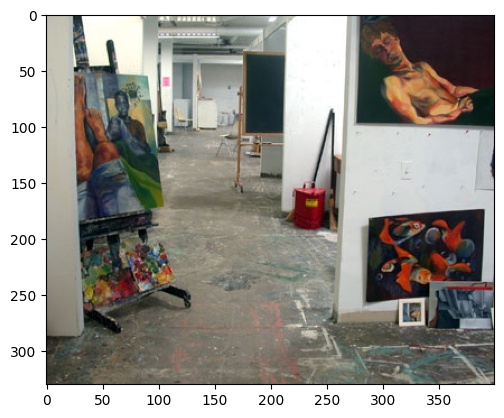

In [11]:
img = Image.open("/media/bharath/drive/Projects/MIT/notebooks/final_data/indoorCVPR_09/Images/artstudio/art_painting_studio_01_17_altavista.jpg")
plt.imshow(img)

In [12]:
class MitDataset(Dataset):
    def __init__(self, annotation_file_path, 
                 image_dir, 
                 transformation=None
                 ):
        self.data_frame = pd.read_csv(annotation_file_path, names=['path'])
        self.image_dir = image_dir
        self.transformation = transformation
    
    def __len__(self):
        return len(self.data_frame)
    
    def __getitem__(self, idx):

    
        label = self._get_image_sample_label(idx)
        label =  class_to_index[label]
        label = torch.tensor(label)

        image_sample_path = self._get_image_sample_path(idx)
        img = Image.open(image_sample_path).convert('RGB')

        if self.transformation:
            image = self.transformation(img)
        
        return image, label
    
    def _get_image_sample_path(self, idx):
        
        relative_path = self.data_frame['path'][idx]
        path = os.path.join(self.image_dir, relative_path)
        return path

    def _get_image_sample_label(self, idx):

        relative_path = self.data_frame['path'][idx]
        return relative_path.split('/')[0]

In [13]:
transformed = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

In [14]:
train_annotation_file_path='/media/bharath/drive/Projects/MIT/notebooks/final_data/TrainImages.txt'
test_annotation_file_path='/media/bharath/drive/Projects/MIT/notebooks/final_data/TestImages.txt'

image_dir='/media/bharath/drive/Projects/MIT/notebooks/final_data/indoorCVPR_09/Images'

In [15]:
train_dataset =MitDataset( annotation_file_path=train_annotation_file_path, image_dir=image_dir, transformation=transformed)
test_dataset =MitDataset( annotation_file_path=test_annotation_file_path, image_dir=image_dir, transformation=transformed)

In [16]:
len(train_dataset), len(test_dataset)

(5360, 1340)

In [17]:
temp_img, temp_lab = train_dataset[7]
type(temp_img), type(temp_lab)

(torch.Tensor, torch.Tensor)

In [19]:
temp_img.shape, temp_lab

(torch.Size([3, 256, 256]), tensor(39))

In [20]:
temp_img, temp_lab = train_dataset[5]
temp_img.shape, temp_lab

(torch.Size([3, 256, 256]), tensor(44))

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_sample_image(img, label):
    print(f'Label of image : {idx_to_classes[int(label)]}, having lable {label}')
    plt.imshow(img.permute(1, 2, 0))

Label of image : subway, having lable 59


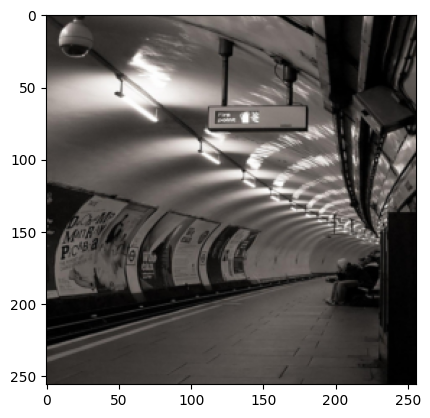

In [22]:
img, label = train_dataset[50]
show_sample_image(img, label)

Label of image : movietheater, having lable 46


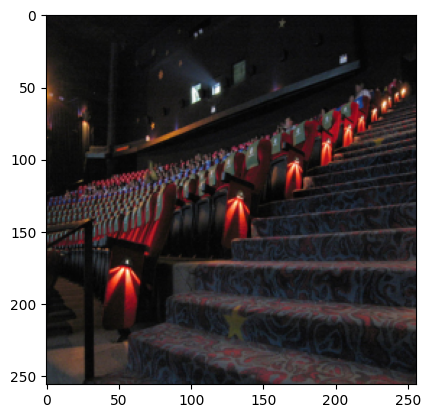

In [23]:
img, label = test_dataset[50]
show_sample_image(img, label)

In [24]:
training, valid = random_split(train_dataset, [4500, 860])
len(training), len(valid)

(4500, 860)

In [33]:
batch_size = 8
training_dl = DataLoader(training, batch_size, shuffle = True, num_workers = 2)
valid_dl = DataLoader(valid, batch_size=1, num_workers = 2)
testing_dl = DataLoader(test_dataset, batch_size=1, num_workers = 2)

In [27]:
def show_batch(dl):
    for images, labels in dl:
        fig, axis = plt.subplots(figsize=(12, 6))
        axis.set_xticks([])
        axis.set_yticks([])
        axis.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
        break

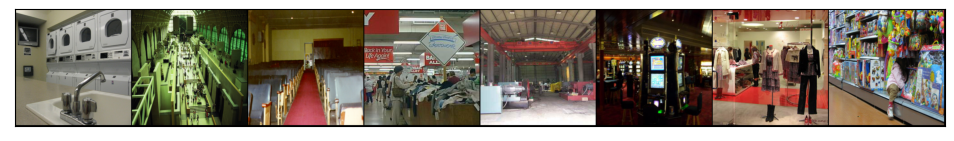

In [28]:
show_batch(training_dl)

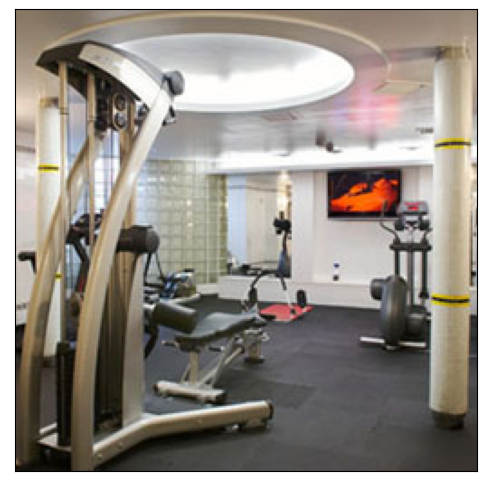

In [34]:
show_batch(valid_dl)

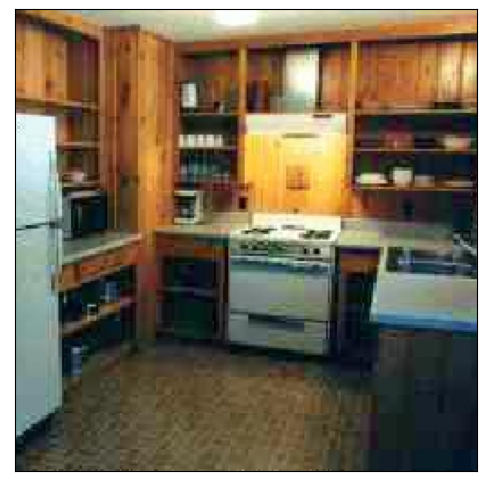

In [30]:
show_batch(testing_dl)

## Custom Model

In [35]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [36]:
class ImageClassificationBase(nn.Module):
    ## generating predictions and calculating loss
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  
        loss = F.cross_entropy(out, labels) 
        return loss
    
    def validation_step(self, batch):
        ## generating predictions, calculating loss and accuracy
        images, labels = batch 
        out = self(images)                    
        loss = F.cross_entropy(out, labels)   
        acc = accuracy(out, labels)           
        return {'validation_step_loss': loss.detach(), 'validation_step_accuracy': acc}
        
    def validation_epoch_end(self, outputs):
        ## combining losses and accuracies
        batch_losses = [x['validation_step_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   
        batch_accs = [x['validation_step_accuracy'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      
        return {'validation_step_loss': epoch_loss.item(), 'validation_step_accuracy': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch {}: train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['validation_step_loss'], result['validation_step_accuracy']))

In [37]:
class ResNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = models.resnet18(pretrained=True)
        # Replacing the last layer with our defined features
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(num_classes))
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model = ResNet()

/media/bharath/drive/Projects/MIT/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/media/bharath/drive/Projects/MIT/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [38]:
class ResNet_152(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = models.resnet152(pretrained=True)
        # Replacing the last layer with our defined features
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(num_classes))
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model_resnet152 = ResNet_152()

/media/bharath/drive/Projects/MIT/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [45]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

def plotting_accuracies(fitted_model):
    accuracies = [x['validation_step_accuracy'] for x in fitted_model]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plotting_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['validation_step_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [40]:
device = get_default_device()
device

device(type='cuda')

In [41]:
training_dl = DeviceDataLoader(training_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
testing_dl = DeviceDataLoader(testing_dl, device)

## Model Training

In [43]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation Phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

# ResNet

In [48]:
model = to_device(ResNet(), device)

In [49]:
evaluate(model, valid_dl)

{'validation_step_loss': 4.2121710777282715,
 'validation_step_accuracy': 0.009302325546741486}

In [50]:
num_epochs = 1
opt_func = torch.optim.RMSprop
lr = 6e-5

fitted_model = fit(num_epochs, lr, model, training_dl, valid_dl, opt_func)

Epoch 1: train_loss: 3.8343, val_loss: 3.5856, val_acc: 0.5895


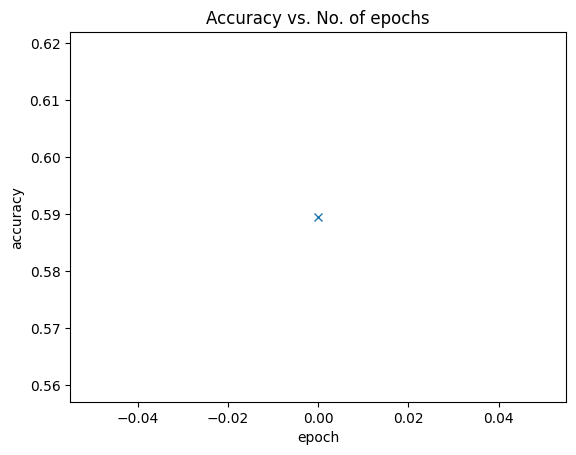

In [51]:
plotting_accuracies(fitted_model)

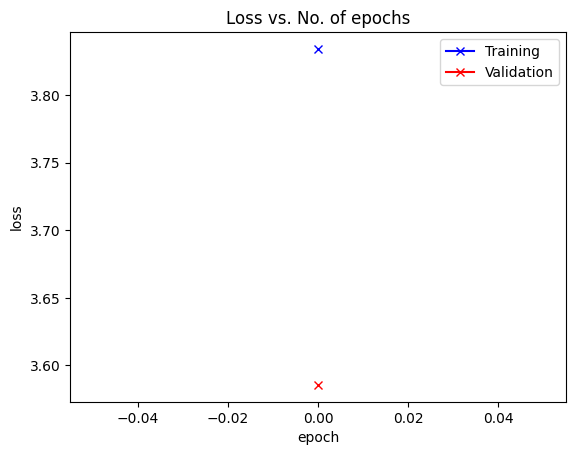

In [52]:
plotting_losses(fitted_model)

In [53]:
evaluate(model, valid_dl)

{'validation_step_loss': 3.5855941772460938,
 'validation_step_accuracy': 0.5895348787307739}

In [54]:
torch.save(model.state_dict(), 'fit_model.pt')

In [ ]:
model_load = to_device(ResNet(), device)
model_load.load_state_dict(torch.load('fit_model.pt'))

model_load.eval()

In [56]:
def predict_image(img, model):
    # Convert to a batch of 1
    ximg = to_device(img.unsqueeze(0), device)
    yimg = model(ximg)
    ## Picking the image with highest probability
    prob, preds  = torch.max(yimg, dim=1)
    # Getting the class label
    return num_classes[preds[0].item()]

Label: hairsalon , Predicted: hairsalon


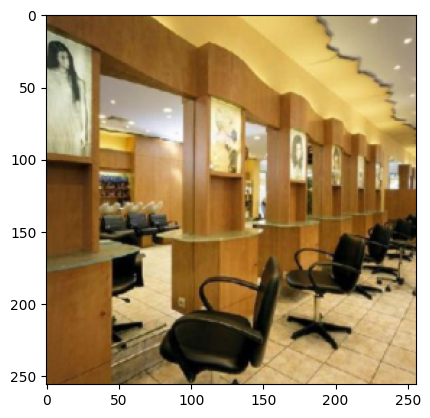

In [57]:
img, label = test_dataset[100]
plt.imshow(img.permute(1, 2, 0))
print('Label:', num_classes[label], ', Predicted:', predict_image(img, model_load))

Label: grocerystore , Predicted: grocerystore


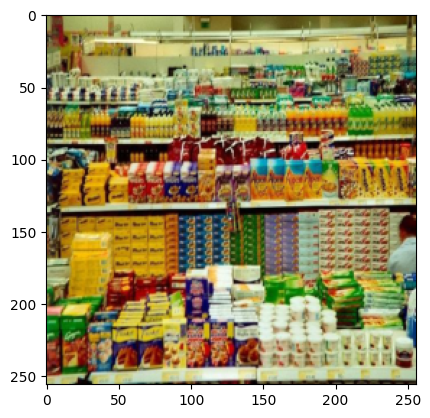

In [58]:
img, label = test_dataset[80]
plt.imshow(img.permute(1, 2, 0))
print('Label:', num_classes[label], ', Predicted:', predict_image(img, model_load))

Label: concert_hall , Predicted: casino


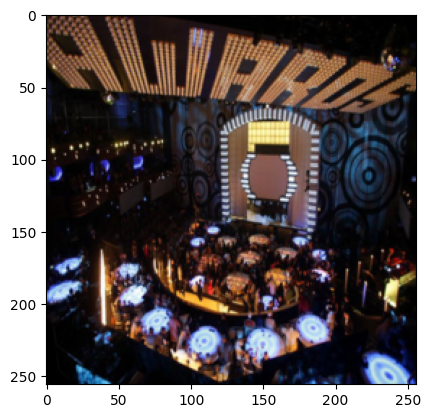

In [59]:
img, label = test_dataset[22]
plt.imshow(img.permute(1, 2, 0))
print('Label:', num_classes[label], ', Predicted:', predict_image(img, model_load))

Label: inside_bus , Predicted: inside_bus


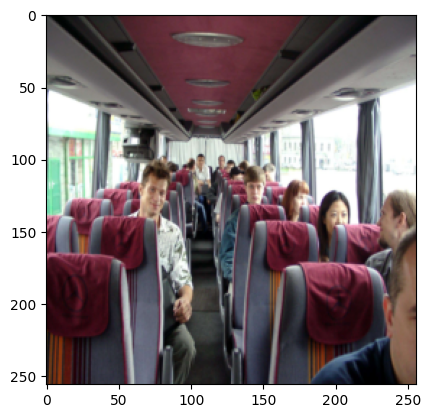

In [60]:
img, label = test_dataset[75]
plt.imshow(img.permute(1, 2, 0))
print('Label:', num_classes[label], ', Predicted:', predict_image(img, model_load))

## ResNet152

In [61]:
model_152 = to_device(ResNet_152(), device)
evaluate(model_152, valid_dl)

{'validation_step_loss': 4.212126731872559,
 'validation_step_accuracy': 0.012790697626769543}

In [62]:
num_epochs = 1
opt_func = torch.optim.RMSprop
lr = 6e-5

fitted_model = fit(num_epochs, lr, model_152, training_dl, valid_dl, opt_func)

Epoch 1: train_loss: 3.8289, val_loss: 3.5422, val_acc: 0.5419


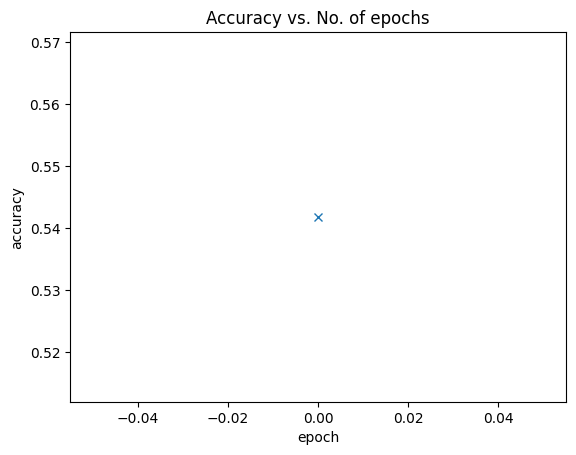

In [63]:
plotting_accuracies(fitted_model)

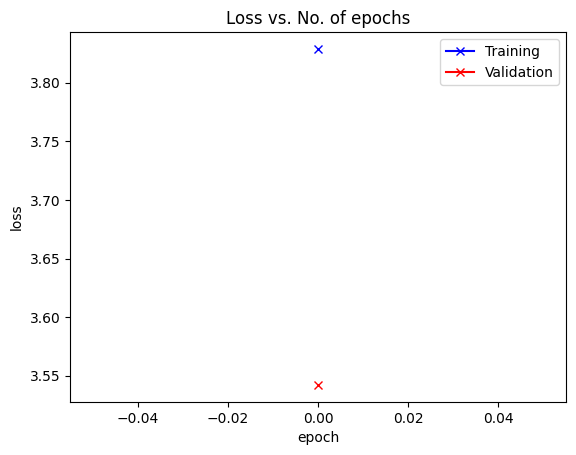

In [64]:
plotting_losses(fitted_model)

In [65]:
evaluate(model_152, testing_dl)

{'validation_step_loss': 3.5514237880706787,
 'validation_step_accuracy': 0.5305970311164856}

In [66]:
torch.save(model_152.state_dict(), 'fit_model_152.pt')

In [67]:
model_load_152 = to_device(ResNet_152(), device)
model_load_152.load_state_dict(torch.load('fit_model_152.pt'))

<All keys matched successfully>

In [ ]:
model_load_152.eval()

Label: concert_hall , Predicted: winecellar


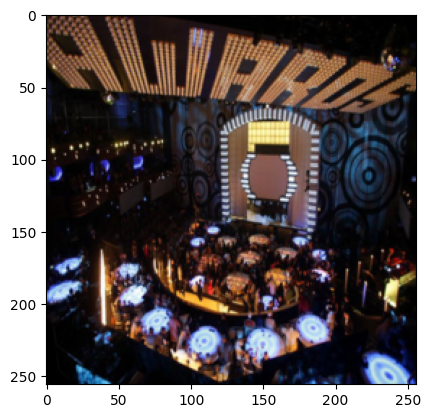

In [69]:
img, label = test_dataset[22]
plt.imshow(img.permute(1, 2, 0))
print('Label:', num_classes[label], ', Predicted:', predict_image(img, model_load_152))

Label: inside_bus , Predicted: inside_bus


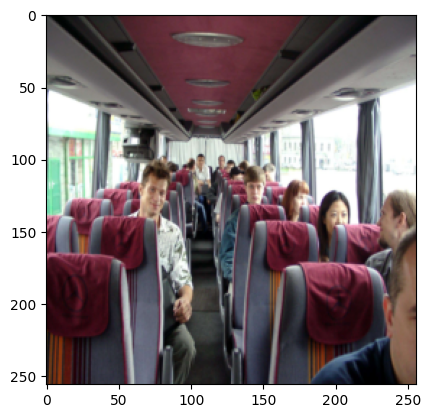

In [70]:
img, label = test_dataset[75]
plt.imshow(img.permute(1, 2, 0))
print('Label:', num_classes[label], ', Predicted:', predict_image(img, model_load_152))

Label: dentaloffice , Predicted: office


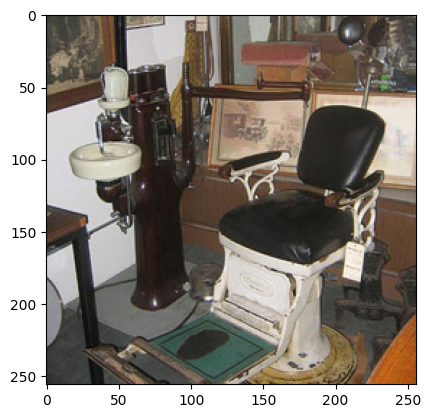

In [71]:
img, label = test_dataset[1000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', num_classes[label], ', Predicted:', predict_image(img, model_load_152))

Label: nursery , Predicted: bedroom


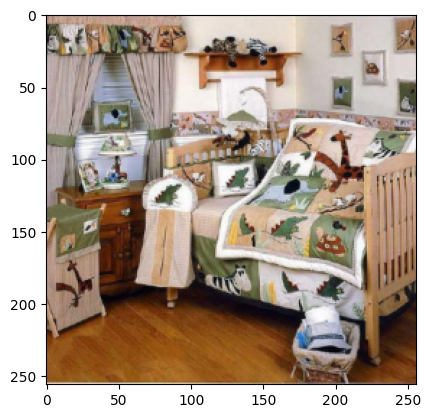

In [72]:
img, label = test_dataset[500]
plt.imshow(img.permute(1, 2, 0))
print('Label:', num_classes[label], ', Predicted:', predict_image(img, model_load_152))